In this example we will fit AFGL 4179 data from WISE catalogue
Firstly, we define functions which we need for WISE radial profile fitter (you will need to import them from WISE_photometry.py file)

In [1]:
import numpy as np
import matplotlib.pyplot as plt

from astropy.io import fits
from astropy.visualization import ImageNormalize, ZScaleInterval, PercentileInterval
from astropy.wcs import WCS
from astropy.wcs.utils import proj_plane_pixel_scales
from astropy import units as u
from astropy.coordinates import SkyCoord

from photutils import SkyCircularAperture
from photutils import CircularAperture
from photutils import CircularAnnulus
from photutils import aperture_photometry
from astropy.stats import sigma_clipped_stats

def photometry_wise1(image_data, radpix, wcs):
    #aperture = CircularAperture((image_data.shape[0]/2,image_data.shape[0]/2), radpix[19])
    position = [image_data.shape[0]/2,image_data.shape[0]/2]
    apertures = [CircularAperture(position, r=r) for r in radpix]
    annulus_aperture = CircularAnnulus(position, r_in=radpix[19], r_out=radpix[19]+radpix[16])
    phot_table = aperture_photometry(image_data, apertures, wcs=wcs)
    
    annulus_masks = annulus_aperture.to_mask(method='center')
    annulus_data = annulus_masks.multiply(image_data)
    mask = annulus_masks.data
    annulus_data_1d = annulus_data[mask > 0]
    _, median_sigclip, _ = sigma_clipped_stats(annulus_data_1d)
    bkg_mean = median_sigclip
    
    #sky_aperture = to_sky(apertures,wcs)
    phot_array = np.zeros(20)
    bkg_sum_array = np.zeros(20)
    for i in range(0,20):
        phot_array[i] = phot_table['aperture_sum_' + str(i)][0]
        bkg_sum_array[i] = bkg_mean * apertures[i].area
    
    final_sum =  phot_array - bkg_sum_array  
    
    scale = np.mean(proj_plane_pixel_scales(wcs))    
    phot_Jy_wise1 = final_sum* 1.9350e-06  #* (scale*np.pi/180.0)**2 
    
    print('Backgorud outer radius =',radpix[19]+radpix[16],'pixels')
    print(phot_table)
    return(phot_Jy_wise1)

def photometry_wise2(image_data, radpix, wcs):
    #aperture = CircularAperture((image_data.shape[0]/2,image_data.shape[0]/2), radpix[19])
    position = [image_data.shape[0]/2,image_data.shape[0]/2]
    apertures = [CircularAperture(position, r=r) for r in radpix]
    annulus_aperture = CircularAnnulus(position, r_in=radpix[19], r_out=radpix[19]+radpix[16])
    phot_table = aperture_photometry(image_data, apertures, wcs=wcs)
    
    annulus_masks = annulus_aperture.to_mask(method='center')
    annulus_data = annulus_masks.multiply(image_data)
    mask = annulus_masks.data
    annulus_data_1d = annulus_data[mask > 0]
    _, median_sigclip, _ = sigma_clipped_stats(annulus_data_1d)
    bkg_mean = median_sigclip
    
    #sky_aperture = to_sky(apertures,wcs)
    phot_array = np.zeros(20)
    bkg_sum_array = np.zeros(20)
    for i in range(0,20):
        phot_array[i] = phot_table['aperture_sum_' + str(i)][0]
        bkg_sum_array[i] = bkg_mean * apertures[i].area
    
    final_sum =  phot_array - bkg_sum_array   
    
    scale = np.mean(proj_plane_pixel_scales(wcs))  
    phot_Jy_wise2 = final_sum*  2.7048e-06 #* (scale*np.pi/180.0)**2  

    
    print('Backgorud outer radius =',radpix[19]+radpix[16],'pixels')
    print(phot_table)
    return(phot_Jy_wise2)

def photometry_wise3(image_data, radpix, wcs):
    #aperture = CircularAperture((image_data.shape[0]/2,image_data.shape[0]/2), radpix[19])
    position = [image_data.shape[0]/2,image_data.shape[0]/2]
    apertures = [CircularAperture(position, r=r) for r in radpix]
    annulus_aperture = CircularAnnulus(position, r_in=radpix[19], r_out=radpix[19]+radpix[16])
    phot_table = aperture_photometry(image_data, apertures, wcs=wcs)
    annulus_masks = annulus_aperture.to_mask(method='center')
    annulus_data = annulus_masks.multiply(image_data)
    mask = annulus_masks.data
    annulus_data_1d = annulus_data[mask > 0]
    _, median_sigclip, _ = sigma_clipped_stats(annulus_data_1d)
    bkg_mean = median_sigclip
    
    #sky_aperture = to_sky(apertures,wcs)
    phot_array = np.zeros(20)
    bkg_sum_array = np.zeros(20)
    for i in range(0,20):
        phot_array[i] = phot_table['aperture_sum_' + str(i)][0]
        bkg_sum_array[i] = bkg_mean * apertures[i].area
    
    final_sum =  phot_array - bkg_sum_array   
    
    scale = np.mean(proj_plane_pixel_scales(wcs))  
    phot_Jy_wise3 = final_sum* 1.8326e-06 #* (scale*np.pi/180.0)**2 #
    
    print('Backgorud outer radius =',radpix[19]+radpix[16],'pixels')
    print(phot_table)
    return(phot_Jy_wise3)


def photometry_wise4(image_data, radpix, wcs):
    #aperture = CircularAperture((image_data.shape[0]/2,image_data.shape[0]/2), radpix[19])
    position = [image_data.shape[0]/2,image_data.shape[0]/2]
    apertures = [CircularAperture(position, r=r) for r in radpix]
    annulus_aperture = CircularAnnulus(position, r_in=radpix[19], r_out=radpix[19]+radpix[16])
    phot_table = aperture_photometry(image_data, apertures, wcs=wcs)
    annulus_masks = annulus_aperture.to_mask(method='center')
    annulus_data = annulus_masks.multiply(image_data)
    mask = annulus_masks.data
    annulus_data_1d = annulus_data[mask > 0]
    _, median_sigclip, _ = sigma_clipped_stats(annulus_data_1d)
    bkg_mean = median_sigclip
    
    #sky_aperture = to_sky(apertures,wcs)
    phot_array = np.zeros(20)
    bkg_sum_array = np.zeros(20)
    for i in range(0,20):
        phot_array[i] = phot_table['aperture_sum_' + str(i)][0]
        bkg_sum_array[i] = bkg_mean * apertures[i].area
    
    final_sum =  phot_array - bkg_sum_array   
    
    scale = np.mean(proj_plane_pixel_scales(wcs))  
    phot_Jy_wise4 = final_sum * 5.2269e-05  #* (scale*np.pi/180.0)**2 # MSX_E W/m^2-sr to Jy *2.476e13*scale**2/((180/np.pi)**2*3600**2)
    
    print('Backgorud outer radius =',radpix[19]+radpix[16],'pixels')
    print(phot_table)
    return(phot_Jy_wise4)

Next, we will define main tools fucntions which needed for operate fits file and chi2 fitting 

In [2]:
def find_nearest(array, value):
    array = np.asarray(array)
    idx = (np.abs(array - value)).argmin()
    return array[idx], idx

def rob_fits(user_fitsfile):
    hdul = fits.open(user_fitsfile)
    wavelength = hdul['SPECTRAL_INFO'].data
    wave = wavelength['WAVELENGTH']
    aperture = hdul['APERTURES'].data
    ap = aperture['APERTURE']  
    fnu = hdul['VALUES'].data
    mod_names = hdul['MODEL_NAMES'].data
    names = np.array(mod_names.astype('<U11'))
    return(ap, wave, fnu*(1000/dist)**2/1000, names)

def user_fits(rob_fitsfile,ap,flag):
    hdul = fits.open(rob_fitsfile)
    hdul.info()
    image_data = hdul[0].data[::-1,: ] #инвертирует ось y
    wcs = WCS(hdul[0].header)
    waveleng = hdul[0].header['WAVELEN']
    scale = np.mean(proj_plane_pixel_scales(wcs))*3600
    #scale = np.abs(CDELT1)*3600  #arcsec/pix
    FOV = image_data.shape[0]*scale
    hdul.close()
    print("Scale =",scale, " arcsec/pix")
    print("FOV=", FOV/60/60, "deg")
    print('Image data shape:', image_data.shape)
    # AU           | 1.49598e+11 m 
    # pc           | 3.08568e+16 m  
    L = dist * FOV    #мой способ!!
    aupixel = L/image_data.shape[0]   # AU in pixel
    radius = ap/aupixel/2

    radpix = ap/2/dist/scale
    print('MAX RADIUS =', radpix[19], 'pix')
    
    #norm = ImageNormalize(image_data, interval=ZScaleInterval())         # Scale = ZScale
    norm = ImageNormalize(image_data, interval=PercentileInterval(99.5))  # Scale = 99.5%

    #ax = plt.subplot(projection=wcs)
    #for i in range(0,len(radpix)):
    #    ax.add_patch(plt.Circle((image_data.shape[0]/2,image_data.shape[0]/2), radpix[i] ,lw = 0.1, color='r', fill=False))
    #    ax.add_patch(plt.Circle((image_data.shape[0]/2,image_data.shape[0]/2), radpix[19]+ radpix[16] ,lw = 0.5, color='green', fill=False))
    #plt.imshow(image_data, cmap='gray',  norm=norm)
    #plt.xlabel('Galactic Longitude')
    #plt.ylabel('Galactic Latitude')
    #plt.colorbar()
    #plt.savefig(str(obj_name +'_' + models +'_' + flag +'.png') , dpi=300)
    print('Min:', np.min(image_data))
    print('Max:', np.max(image_data))
    print('Mean:', np.mean(image_data))
    print('Stdev:', np.std(image_data))
    return(image_data, radpix, wcs, scale, waveleng,  aupixel )

def chi2_func(phot_Jy, fnu, wave_index, models,names,flag):
    chi2 = np.zeros(fnu.shape[0])
    for i in range(0,fnu.shape[0]):
        #chi2[i] = ((phot_Jy_MSX_A - fnu[i,:,wave_index])**2 *radpix**2).sum()
        chi2[i] = ((phot_Jy - fnu[i,:,wave_index])**2).sum()
        #idx = [chi2 == min(chi2)]
    #index = np.where(idx)[1]
    index = np.where(chi2 == np.nanmin(chi2))[0]
    #print('chi2 min =',np.nanmin(chi2))
    #print(index)
    plt.figure()
    plt.plot(ap , phot_Jy, 'r.') # MSX_A W/m^2-sr to Jy *7.133e12*scale**2/((180/np.pi)**2*3600**2)
    plt.plot(ap , fnu[int(index) ,:,wave_index], 'b.')
    plt.xlabel('AU')
    plt.ylabel('Jy')
    plt.title('%s  %s \n $\chi^2$ = %f %s \n WISE_%s'%(obj_name, models, chi2[index], names[index],flag))
    #plt.savefig(str('fit_'+ obj_name +'_' + models +'.png') , dpi=300)
    plt.show()
    return(chi2, wave_index)


Below we will define object name, distance and which models we want to use. Alse need to define where is WISE fits files.

In [3]:
obj_name = 'AFGL 4179'
dist = 664 #pc
arr= ['spubhmi']
#arr=['s-pbhmi','s-pbsmi','sp--h-i','s-p-hmi','sp--hmi','sp--s-i','s-p-smi','sp--smi',
#    'spu-hmi','spu-smi','s---s-i','s---smi','s-ubhmi','s-ubsmi','s-u-hmi','s-u-smi']
arr_userfile=['/home/buddy/Documents/MIPT/WISE Images/AFGL4176wise-3a-1.fits', '//home/buddy/Documents/MIPT/WISE Images/AFGL4176wise-3a-2.fits',
              '/home/buddy/Documents/MIPT/WISE Images/AFGL4176wise-3a-3.fits', '//home/buddy/Documents/MIPT/WISE Images/AFGL4176wise-3a-4.fits']

Here presented code to use tools to fit WISE data, at last figure shown final model, which choosen by summing chi2 of different WISE filters


Filename: /home/buddy/Documents/MIPT/WISE Images/AFGL4176wise-3a-1.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      67   (1496, 1747)   float32   
Scale = 1.37499998090796  arcsec/pix
FOV= 0.6672569351795018 deg
Image data shape: (1747, 1496)
MAX RADIUS = 547.6451335624973 pix
Min: 3.5133233
Max: 4935.188
Mean: 6.1069913
Stdev: 37.339527
Backgorud outer radius = 675.5597831529626 pixels
 id xcenter ycenter ...  aperture_sum_17   aperture_sum_18    aperture_sum_19 
      pix     pix   ...                                                       
--- ------- ------- ... ----------------- ------------------ -----------------
  1   873.5   873.5 ... 2867108.622041298 3922561.2090125605 6726544.452850306
User waveleng = 3.368 um
Models waveleng = 3.325019647959792 um /index = 111


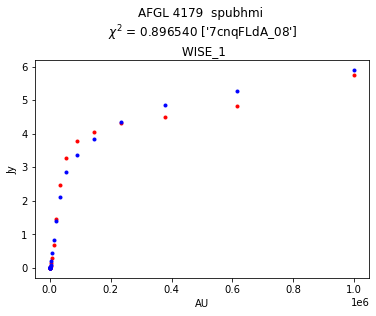

Filename: //home/buddy/Documents/MIPT/WISE Images/AFGL4176wise-3a-2.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      67   (1496, 1747)   float32   
Scale = 1.37499998090796  arcsec/pix
FOV= 0.6672569351795018 deg
Image data shape: (1747, 1496)
MAX RADIUS = 547.6451335624973 pix
Min: nan
Max: nan
Mean: nan
Stdev: nan
Backgorud outer radius = 675.5597831529626 pixels
 id xcenter ycenter ...  aperture_sum_17   aperture_sum_18   aperture_sum_19  
      pix     pix   ...                                                       
--- ------- ------- ... ----------------- ----------------- ------------------
  1   873.5   873.5 ... 2636209.343792222 4937851.199146686 11003921.081971988
User waveleng = 4.618 um
Models waveleng = 4.616028335312994 um /index = 106


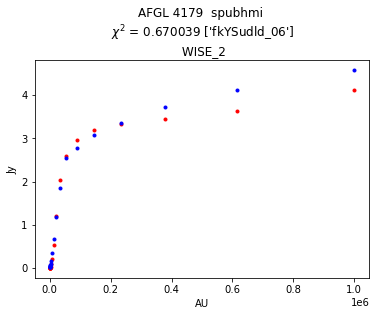

Filename: /home/buddy/Documents/MIPT/WISE Images/AFGL4176wise-3a-3.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      71   (1496, 1747)   float32   
Scale = 1.37499998090796  arcsec/pix
FOV= 0.6672569351795018 deg
Image data shape: (1747, 1496)
MAX RADIUS = 547.6451335624973 pix
Min: 609.023
Max: 4567.243
Mean: 625.6295
Stdev: 30.760612
Backgorud outer radius = 675.5597831529626 pixels
 id xcenter ycenter ...  aperture_sum_17   aperture_sum_18   aperture_sum_19 
      pix     pix   ...                                                      
--- ------- ------- ... ----------------- ----------------- -----------------
  1   873.5   873.5 ... 85476181.73825094 223692996.8618061 588487954.0284463
User waveleng = 12082000.0 um
Models waveleng = 12.35068986454994 um /index = 91


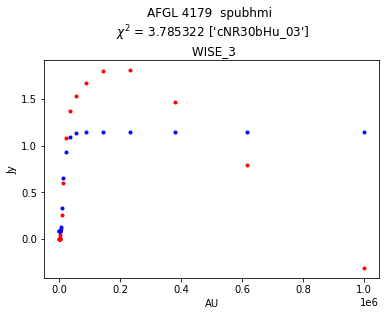

Filename: //home/buddy/Documents/MIPT/WISE Images/AFGL4176wise-3a-4.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      67   (1496, 1747)   float32   
Scale = 1.37499998090796  arcsec/pix
FOV= 0.6672569351795018 deg
Image data shape: (1747, 1496)
MAX RADIUS = 547.6451335624973 pix
Min: 200.2056
Max: 265.8953
Mean: 201.1481
Stdev: 0.5793615
Backgorud outer radius = 675.5597831529626 pixels
 id xcenter ycenter ... aperture_sum_17  aperture_sum_18   aperture_sum_19  
      pix     pix   ...                                                     
--- ------- ------- ... ---------------- ---------------- ------------------
  1   873.5   873.5 ... 27273819.7222021 71877572.5680347 189491032.81339917
User waveleng = 22.194 um
Models waveleng = 22.29178607066644 um /index = 82


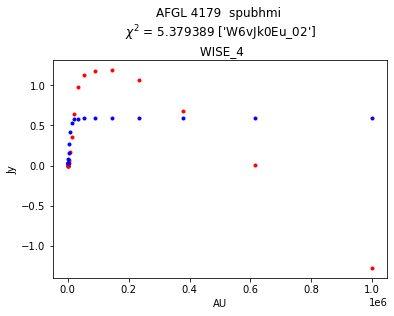

final_chi2 min = 142.8066735991218
[590579]


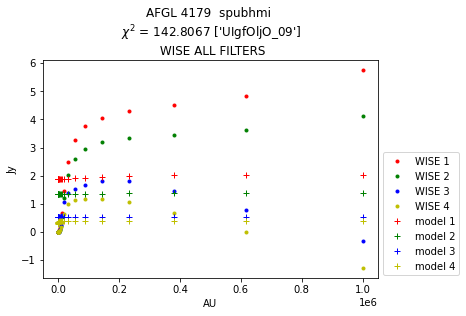

In [4]:
for models in arr:
    rob_fitsfile = '/home/buddy/Documents/MIPT/Hyperion/%s/flux.fits'%(models)
    ap, wave, fnu, names = rob_fits(rob_fitsfile)
   
    image_data, radpix, wcs, scale, waveleng, aupixel  = user_fits(arr_userfile[0], ap, flag='1')
    image_data = np.nan_to_num(image_data, nan=0.0)
    phot_Jy_wise1 = photometry_wise1(image_data, radpix, wcs)
    rob_wave, wave_index = find_nearest(wave, waveleng)
    print('User waveleng =', waveleng, 'um')
    print('Models waveleng =', rob_wave, 'um', '/index =',wave_index)
    chi2_1, wave1_index = chi2_func(phot_Jy_wise1, fnu, wave_index, models, names, flag ='1')
    
    image_data, radpix, wcs, scale, waveleng, aupixel  = user_fits(arr_userfile[1], ap, flag='2')
    image_data = np.nan_to_num(image_data, nan=0.0)
    phot_Jy_wise2 = photometry_wise2(image_data, radpix, wcs)
    rob_wave, wave_index = find_nearest(wave, waveleng)
    print('User waveleng =', waveleng, 'um')
    print('Models waveleng =', rob_wave, 'um', '/index =',wave_index)
    chi2_2, wave2_index  = chi2_func(phot_Jy_wise2, fnu, wave_index, models, names, flag ='2')
    
    image_data, radpix, wcs, scale, waveleng, aupixel  = user_fits(arr_userfile[2], ap, flag='3')
    image_data = np.nan_to_num(image_data, nan=0.0)
    phot_Jy_wise3 = photometry_wise3(image_data, radpix, wcs)
    rob_wave, wave_index = find_nearest(wave, waveleng)
    print('User waveleng =', waveleng*1e6, 'um')
    print('Models waveleng =', rob_wave, 'um', '/index =',wave_index)
    chi2_3, wave3_index  = chi2_func(phot_Jy_wise3, fnu, wave_index, models, names, flag ='3')
    
    image_data, radpix, wcs, scale, waveleng, aupixel  = user_fits(arr_userfile[3], ap, flag='4')
    image_data = np.nan_to_num(image_data, nan=0.0)
    phot_Jy_wise4 = photometry_wise4(image_data, radpix, wcs)
    rob_wave, wave_index = find_nearest(wave, waveleng)
    print('User waveleng =', waveleng, 'um')
    print('Models waveleng =', rob_wave, 'um', '/index =',wave_index)
    chi2_4, wave4_index  = chi2_func(phot_Jy_wise4, fnu, wave_index, models, names, flag ='4')
        
    final_chi2 = chi2_1 + chi2_2 + chi2_3 + chi2_4
    index = np.where(final_chi2 == np.nanmin(final_chi2))[0]
    
    print('final_chi2 min =',np.nanmin(final_chi2))
    print(index)
    plt.figure()
    plt.plot(ap , phot_Jy_wise1, 'r.', label="WISE 1") 
    plt.plot(ap , phot_Jy_wise2, 'g.', label="WISE 2")
    plt.plot(ap , phot_Jy_wise3, 'b.', label="WISE 3")
    plt.plot(ap , phot_Jy_wise4, 'y.', label="WISE 4")
    plt.plot(ap , fnu[int(index) ,:,wave1_index], 'r+', label="model 1")
    plt.plot(ap , fnu[int(index) ,:,wave2_index], 'g+', label="model 2")
    plt.plot(ap , fnu[int(index) ,:,wave3_index], 'b+', label="model 3")
    plt.plot(ap , fnu[int(index) ,:,wave4_index], 'y+', label="model 4")
    plt.legend(bbox_to_anchor=(1, 0.6))
    plt.xlabel('AU')
    plt.ylabel('Jy')
    plt.title('%s  %s \n $\chi^2$ = %0.4f %s \n WISE ALL FILTERS'%(obj_name, models, final_chi2[index], names[index]))
    #plt.savefig(str('fit_'+ obj_name +'_'+'ACDE'+'_' + models +'.png') , dpi=300)
    plt.show()